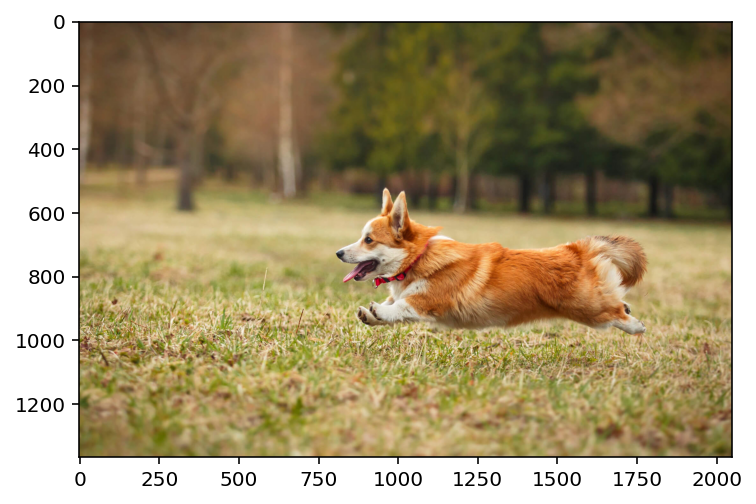

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

img = plt.imread('dog.jpg')
plt.imshow(img)

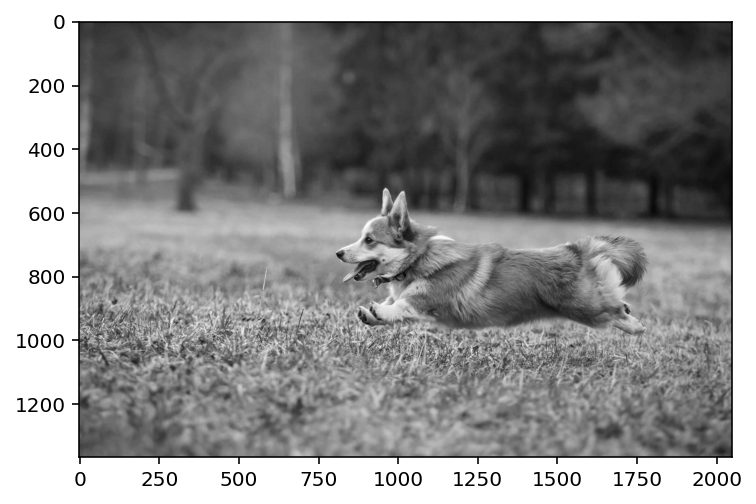

In [2]:
# Convert to grayscale
img = img.mean(axis=2)
plt.imshow(img, cmap='gray')

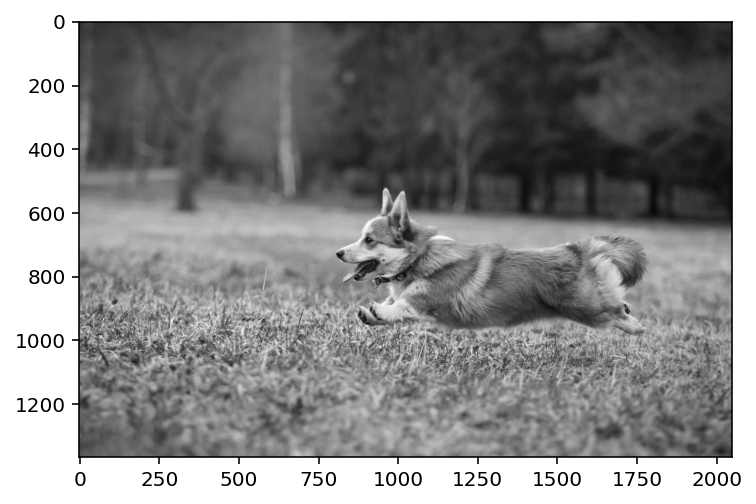

In [3]:
img = img/255
plt.imshow(img, cmap='gray')

In [7]:
img.shape

(1365, 2048)

In [32]:
# MF code with missing values
import torch
import torch.nn as nn
import torch.nn.functional as F

# INIT WELL!

def factorize(A, k, niter=100, lr=1e-3):
    n, m = A.shape
    # If we do not init well, our solution is poor
    W = torch.abs(torch.randn(n, k)/10).to(A.device)
    H = torch.abs(torch.randn(k, m)/10).to(A.device)
    #W = torch.randn(n, k).to(A.device)
    #H = torch.randn(k, m).to(A.device)
    W.requires_grad = True
    H.requires_grad = True

    # Mask where A is not missing
    mask = ~torch.isnan(A).to(A.device)
    print(mask.shape)

    optimizer = torch.optim.Adam([W, H], lr=lr)
    for i in range(niter):
        optimizer.zero_grad()
        Ahat = W @ H
        loss = F.mse_loss(Ahat[mask], A[mask])
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(i, loss.item())
    return W, H


In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
A = torch.from_numpy(img).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06899718195199966
50 0.010017945431172848
100 0.004583133850246668
150 0.0028046893421560526
200 0.0018594106659293175
250 0.001452349592000246
300 0.00131764798425138
350 0.001272885361686349
400 0.0012544193305075169
450 0.0012451813090592623


In [35]:
W@H

tensor([[0.2084, 0.2101, 0.2124,  ..., 0.2132, 0.2165, 0.2187],
        [0.2090, 0.2107, 0.2130,  ..., 0.2131, 0.2163, 0.2185],
        [0.2092, 0.2109, 0.2132,  ..., 0.2119, 0.2150, 0.2171],
        ...,
        [0.3419, 0.3364, 0.3296,  ..., 0.3340, 0.3331, 0.3322],
        [0.3406, 0.3352, 0.3286,  ..., 0.3410, 0.3400, 0.3391],
        [0.3399, 0.3348, 0.3284,  ..., 0.3463, 0.3452, 0.3443]],
       device='cuda:0', grad_fn=<MmBackward0>)

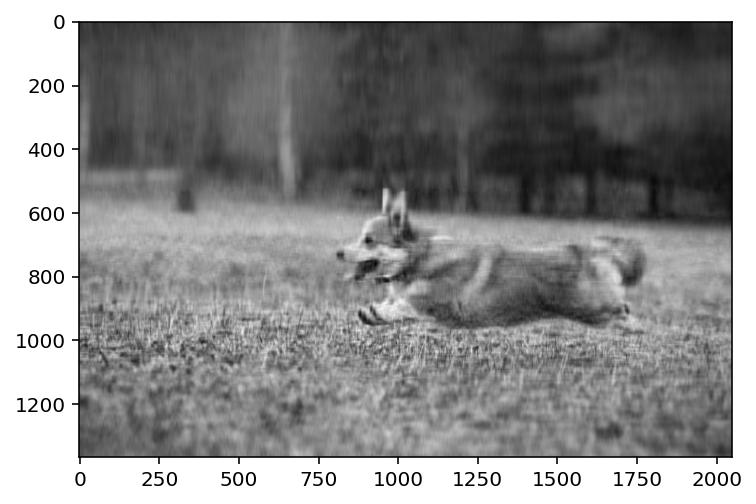

In [36]:
# Plot reconstructed image
plt.imshow((W @ H).cpu().detach().numpy(), cmap='gray')

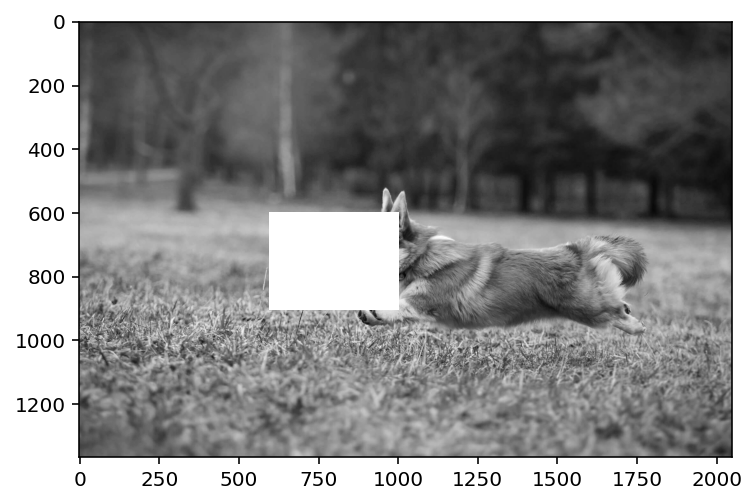

In [14]:
# Now, remove a rectangular patch from the image

patch = [600, 600, 900, 1000]
img_copy = img.copy()

# NAN the patch region
img_copy[patch[0]:patch[2], patch[1]: patch[3]] = np.NaN
plt.imshow(img_copy,cmap='gray')

In [15]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06408126652240753
50 0.009235438890755177
100 0.004174043890088797
150 0.002459741896018386
200 0.0016036551678553224
250 0.0012612321879714727
300 0.001155527075752616
350 0.0011186705669388175
400 0.0011004399275407195
450 0.001089434023015201


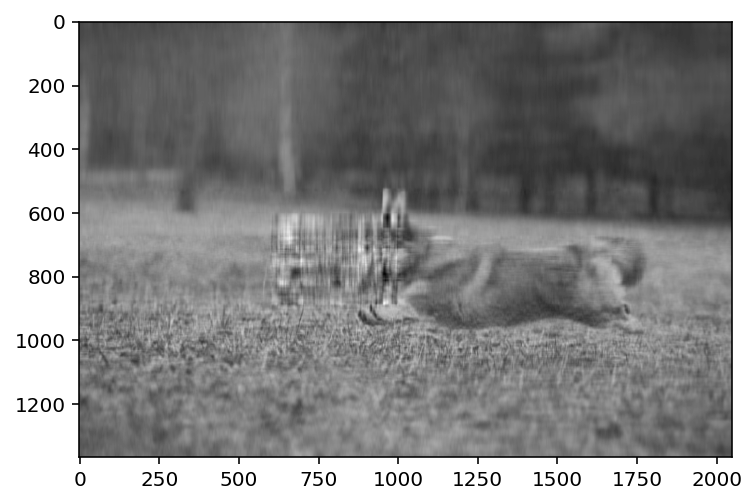

In [16]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

In [17]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 200, niter=1000, lr=1e-2)

torch.Size([1365, 2048])
0 0.745537519454956
50 0.014033811166882515
100 0.006585388910025358
150 0.0039051645435392857
200 0.0023795326706022024
250 0.0014881007373332977
300 0.0009968953672796488
350 0.0007123255636543036
400 0.0005354612949304283
450 0.0004198925453238189
500 0.0003404634480830282
550 0.00028347159968689084
600 0.0002411041350569576
650 0.00020870099251624197
700 0.0001833428832469508
750 0.00016311286890413612
800 0.0001467068213969469
850 0.00013321208825800568
900 0.00012197894102428108
950 0.0001125385460909456


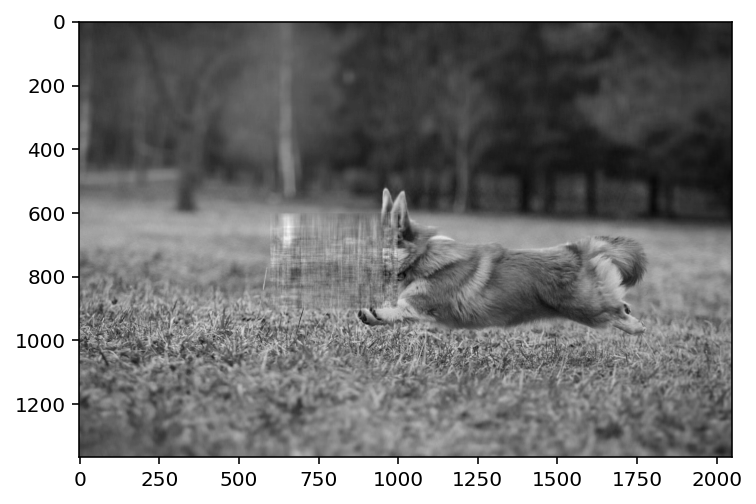

In [18]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

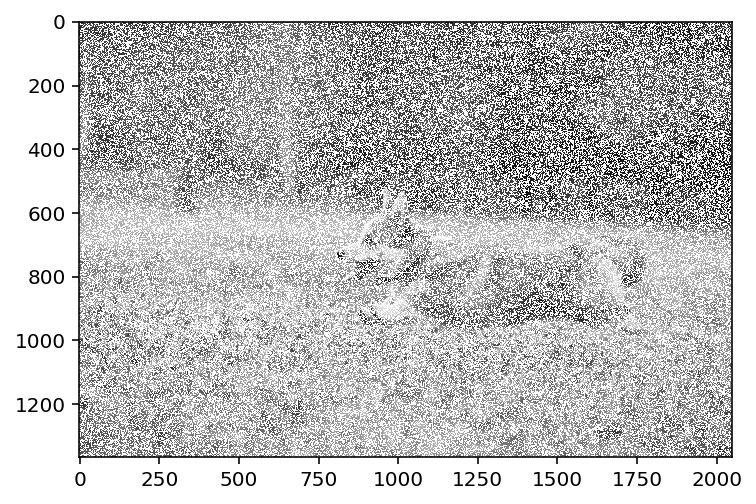

In [19]:
import numpy.ma as ma

img_copy_mar = img.copy()
# Mask 50% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.5
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [20]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06749840080738068
50 0.009521582163870335
100 0.004410044755786657
150 0.0026408638805150986
200 0.00173112191259861
250 0.0013635847717523575
300 0.00121410156134516
350 0.001163529814220965
400 0.00114450475666672
450 0.0011350518325343728


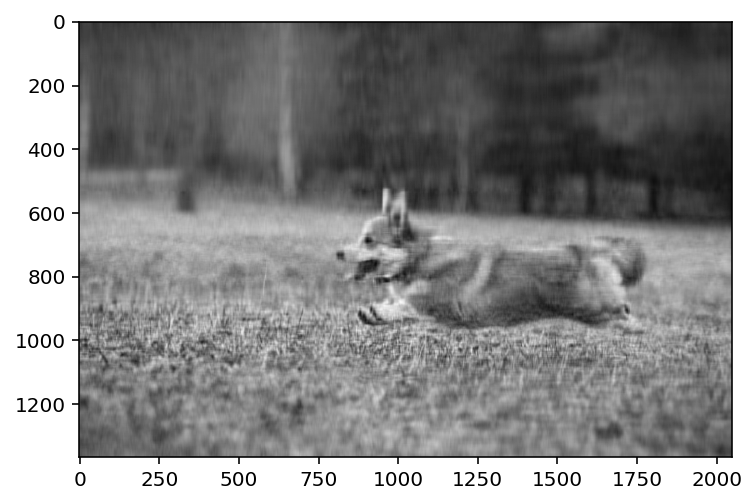

In [21]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

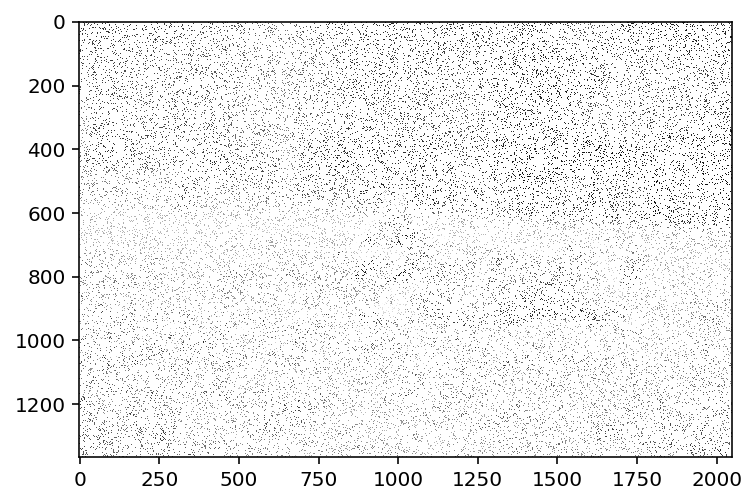

In [22]:
img_copy_mar = img.copy()
# Mask 95% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.90
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [25]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 12, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.1652921885251999
50 0.011481668800115585
100 0.010577931068837643
150 0.00767508614808321
200 0.005586703773587942
250 0.004488078411668539
300 0.0038986506406217813
350 0.003568559419363737
400 0.0033569824881851673
450 0.0032061892561614513


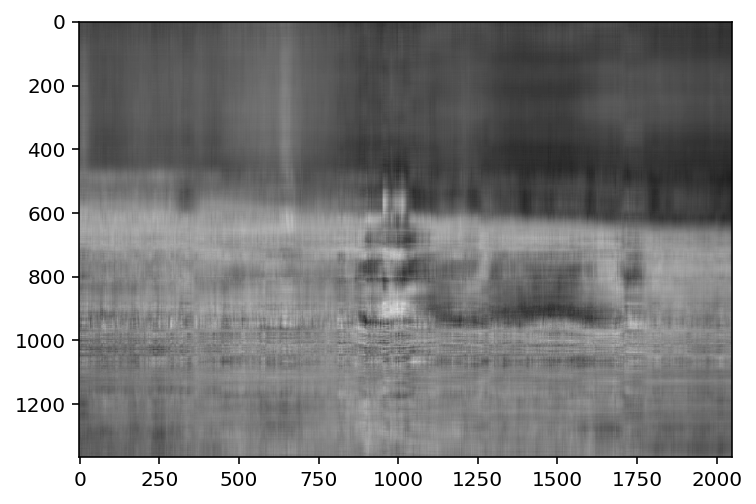

In [26]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')